In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%run ../../helper/preprocess.py
%run ../../helper/aggregate.py
%run ../../helper/utils.py
%run xy_plot.py

matplotlib.rcParams['pdf.fonttype'] = 42
sns.set(font_scale=2)
sns.set_style("whitegrid")
figsize = (24, 6)
bbox_to_anchor = (0.5, -0.1)

In [2]:
metric_types = ['Image Similarity', 'Squared Centroid Distance', 'Text Similarity', 'Vendi']
encoders = ['DINOv2', 'DINOv2', 'CLIP', 'DINOv2']
modes = ['padding']
prompt_types = ['in', 'trigger', 'out']

metrics_to_include = get_metric_list(metric_types, encoders, modes,
                                     prompt_types, style_with_base_model=False)
display(metrics_to_include)

[('Image Similarity', 'DINOv2-padding', 'in'),
 ('Image Similarity', 'DINOv2-padding', 'trigger'),
 ('Image Similarity', 'DINOv2-padding', 'out'),
 ('Squared Centroid Distance', 'DINOv2-padding', 'in'),
 ('Squared Centroid Distance', 'DINOv2-padding', 'trigger'),
 ('Squared Centroid Distance', 'DINOv2-padding', 'out'),
 ('Text Similarity', 'CLIP', 'in'),
 ('Text Similarity', 'CLIP', 'trigger'),
 ('Text Similarity', 'CLIP', 'out'),
 ('Vendi', 'DINOv2', 'in'),
 ('Vendi', 'DINOv2', 'trigger'),
 ('Vendi', 'DINOv2', 'out')]

In [3]:
metrics_file = '../../metrics/ddim_sd15_metrics.csv'
config_file = '../../../exp_configs/config_mapping.csv'

keywords_to_exclude = ['1027']

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    metrics_to_include=metrics_to_include,
    keywords_to_exclude=None)

In [4]:
metrics_to_plot = [(('Text Similarity', 'CLIP', 'out'),
                    ('Image Similarity', 'DINOv2-padding', 'out')),
                   (('Vendi', 'DINOv2', 'out'), ('Squared Centroid Distance',
                                                 'DINOv2-padding', 'out')),
                   (('Vendi', 'DINOv2', 'trigger'),
                    ('Squared Centroid Distance', 'DINOv2-padding', 'trigger'))
                   ]

In [ ]:
metrics_of_interest = [('Image Similarity', 'DINOv2-padding', 'in'),
                       ('Image Similarity', 'DINOv2-padding', 'trigger'),
                       ('Image Similarity', 'DINOv2-padding', 'out'),
                       ('Text Similarity', 'CLIP', 'out'),
                       ('Vendi', 'DINOv2', 'trigger'),
                       ('Vendi', 'DINOv2', 'out')]

In [5]:
category = 'scene'

extra_conodition = {
    'Category': category,
}

## Step

In [18]:
metrics_aggregated = filter_config_and_aggregate(metrics_processed, [],
                                                 extra_conodition)
shape_mapping = {
    10: 'step=10',
    30: 'step=30',
    50: 'step=50',
}

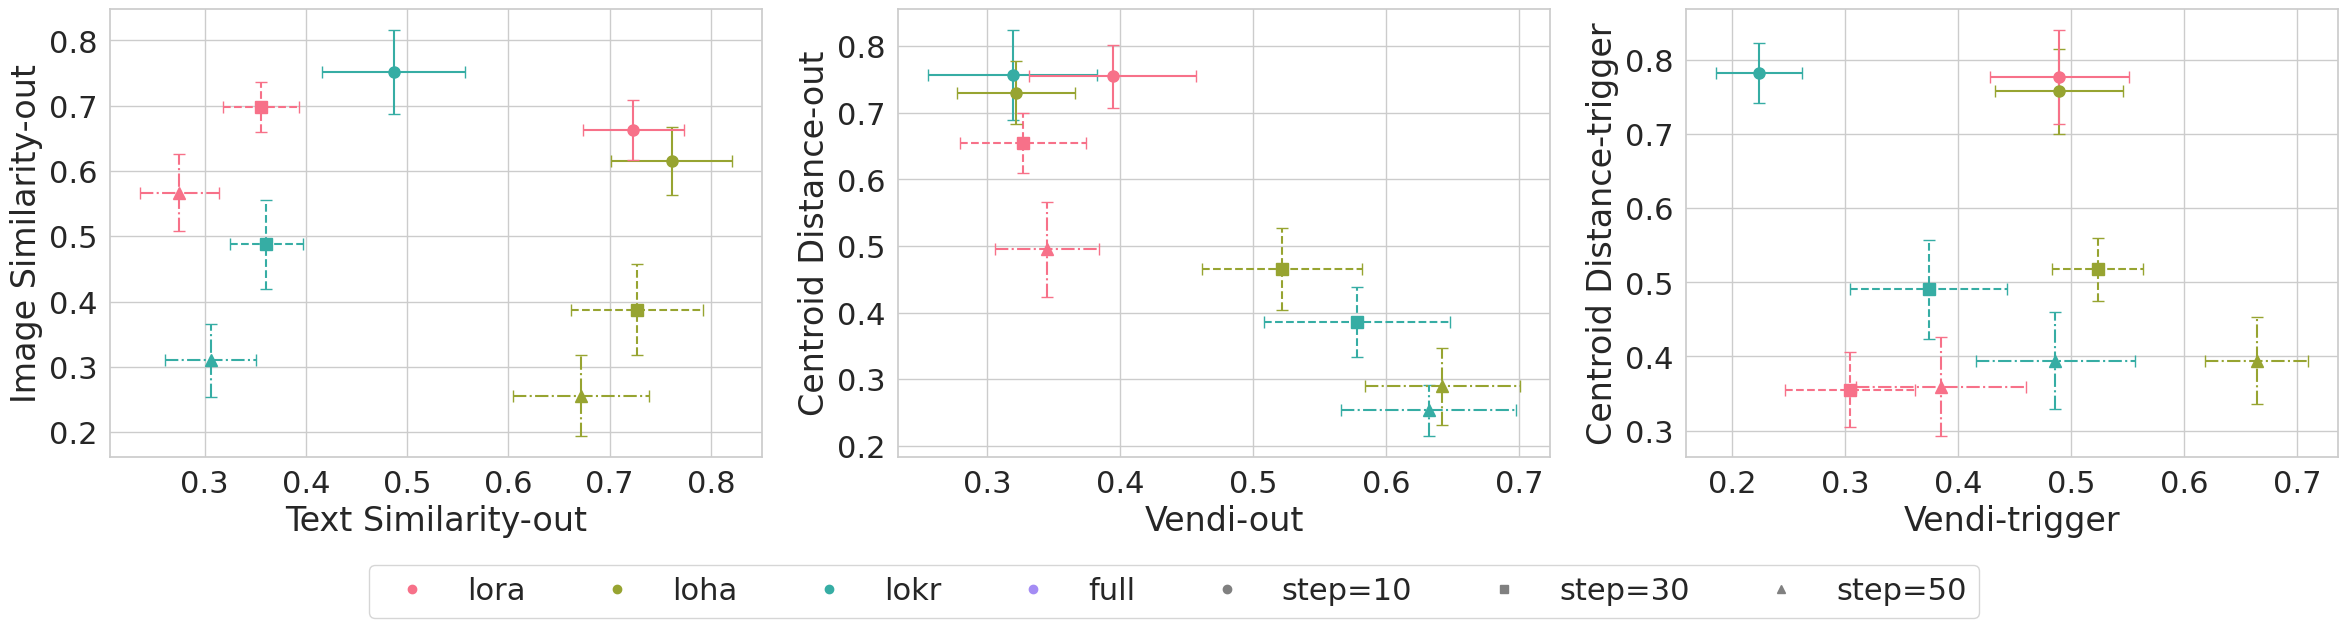

In [19]:
plt.figure(figsize=figsize)

for i, metric_pair in enumerate(metrics_to_plot):
    plt.subplot(1, 3, i + 1)
    legend_handles = plot_metrics_xy(metrics_aggregated,
                                     metric_pair[0],
                                     metric_pair[1],
                                     color_by='Algo',
                                     shape_by='Step',
                                     shape_mapping=shape_mapping,
                                     legend=False,
                                     step=None)
fig = plt.gcf()
fig.legend(
    handles=legend_handles,
    loc='lower center',
    bbox_to_anchor=bbox_to_anchor,
    ncol=len(legend_handles))
plt.tight_layout()
plt.savefig(f'figures/step/step_{category}_xyplot.png',
            bbox_inches='tight',
            pad_inches=0.2)

## Preset

In [20]:
metrics_aggregated = filter_config_and_aggregate(metrics_processed, ['Preset'],
                                                 extra_conodition)

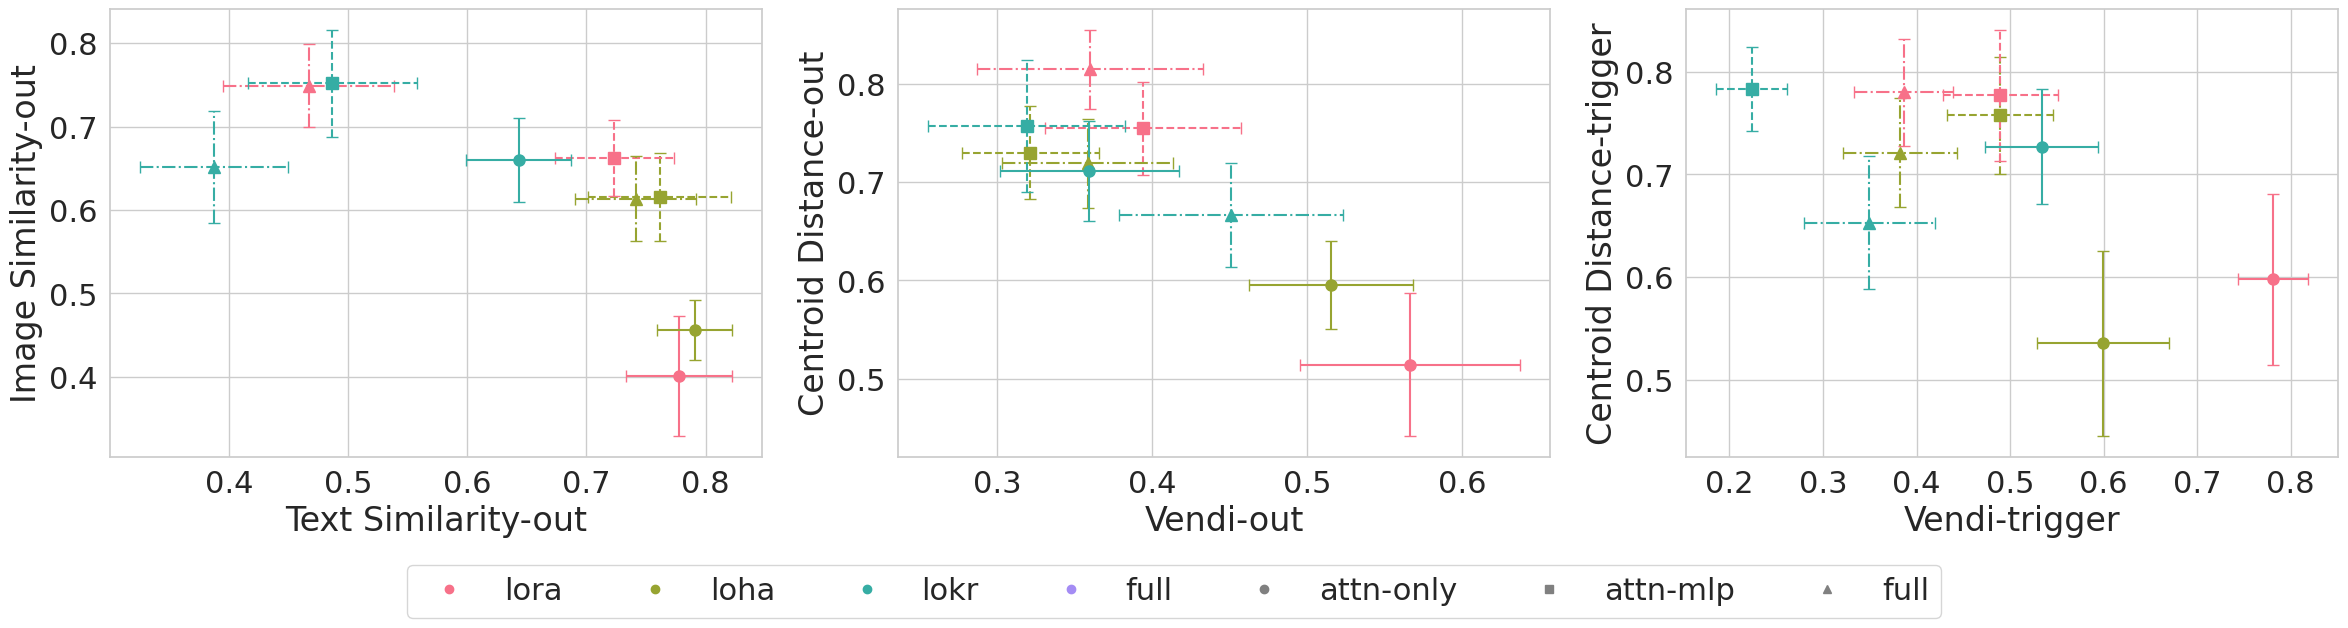

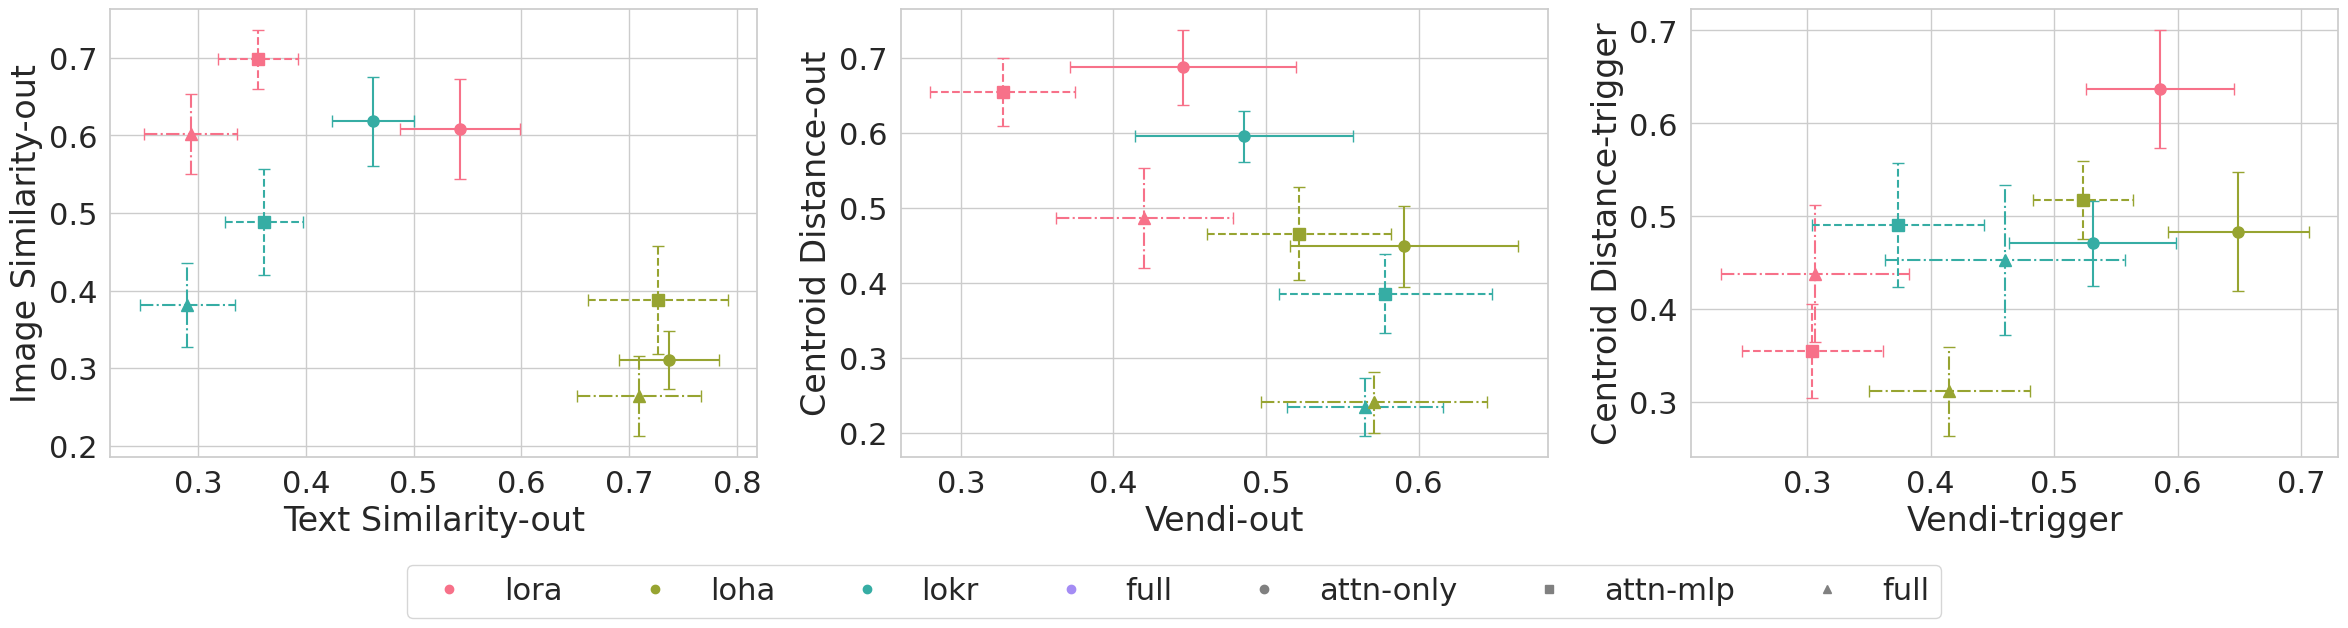

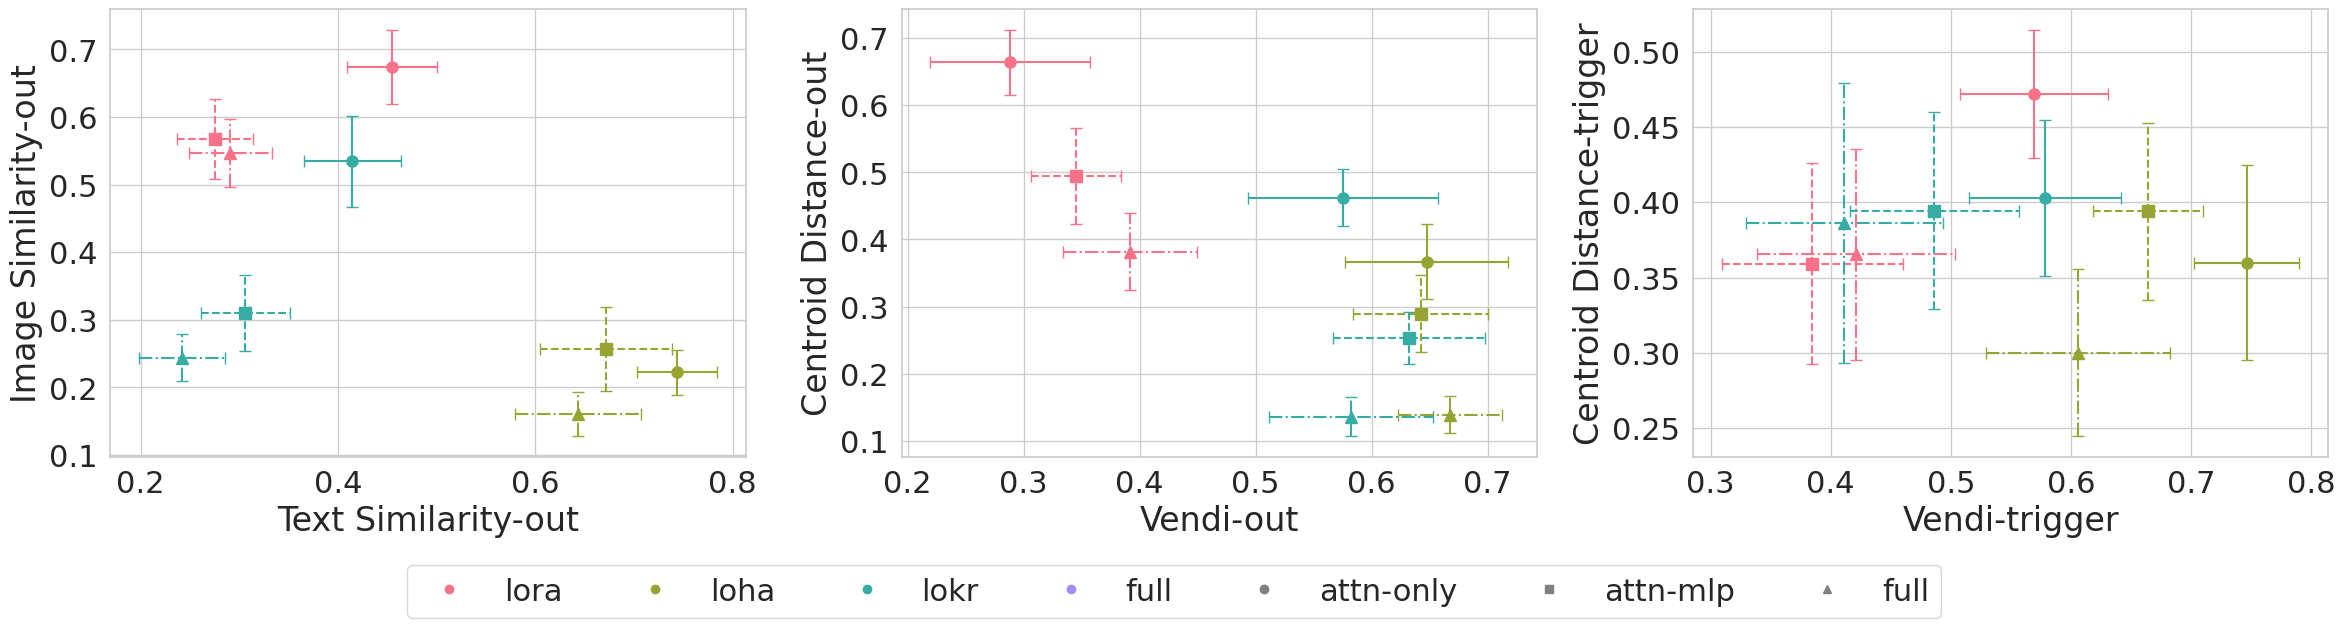

In [17]:
for step in [10, 30, 50]:
    plt.figure(figsize=figsize)

    for i, metric_pair in enumerate(metrics_to_plot):
        plt.subplot(1, 3, i + 1)
        legend_handles = plot_metrics_xy(metrics_aggregated,
                                         metric_pair[0],
                                         metric_pair[1],
                                         color_by='Algo',
                                         shape_by='Preset',
                                         legend=False,
                                         step=step)
    fig = plt.gcf()
    fig.legend(handles=legend_handles,
               loc='lower center',
               bbox_to_anchor=bbox_to_anchor,
               ncol=len(legend_handles))
    plt.tight_layout()
    plt.savefig(f'figures/preset/preset-{step}_{category}_xyplot.png',
                bbox_inches='tight',
                pad_inches=0.2)

## Capacity

In [21]:
metrics_aggregated = filter_config_and_aggregate(metrics_processed,
                                                 ['Dim', 'Factor'],
                                                 extra_conodition)
metrics_aggregated = transform_attributes(metrics_aggregated,
                                          multiindex=True,
                                          drop=False)
condition = (metrics_aggregated['Alpha']
             == 1) & (metrics_aggregated['Algo'].isin(['lora', 'loha']))
metrics_aggregated.loc[condition, 'Capacity'] = 4
shape_mapping = {
    1: 'factor=12',
    2: 'dim=4/8 | factor=8',
    3: 'dim=16/32 | factor=4',
    4: 'alpha=1'
}

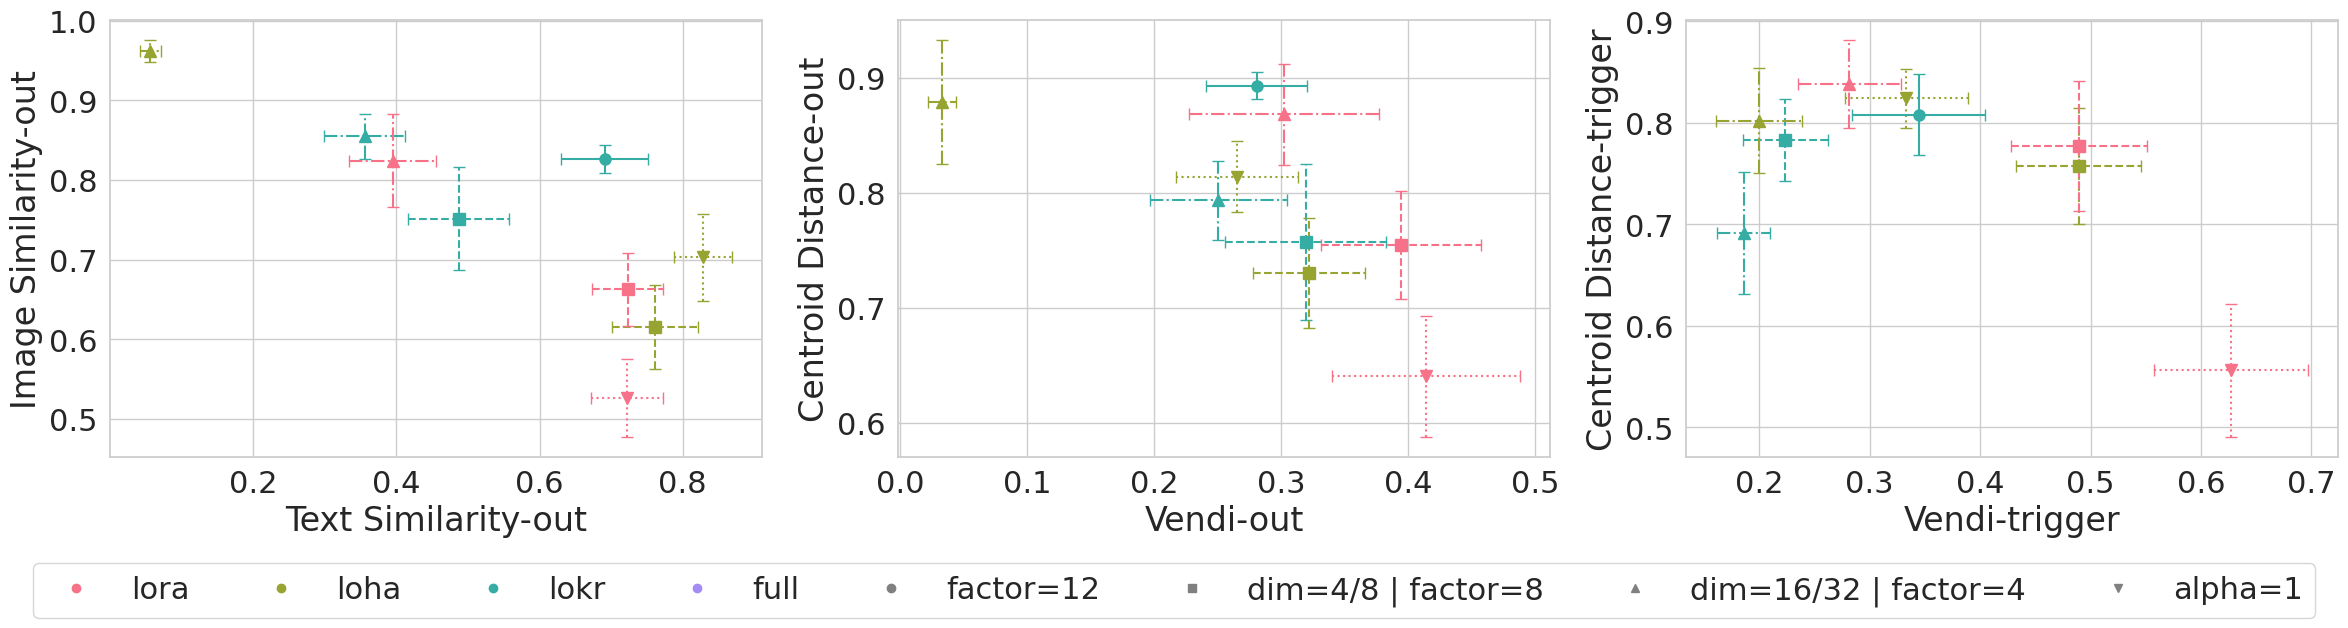

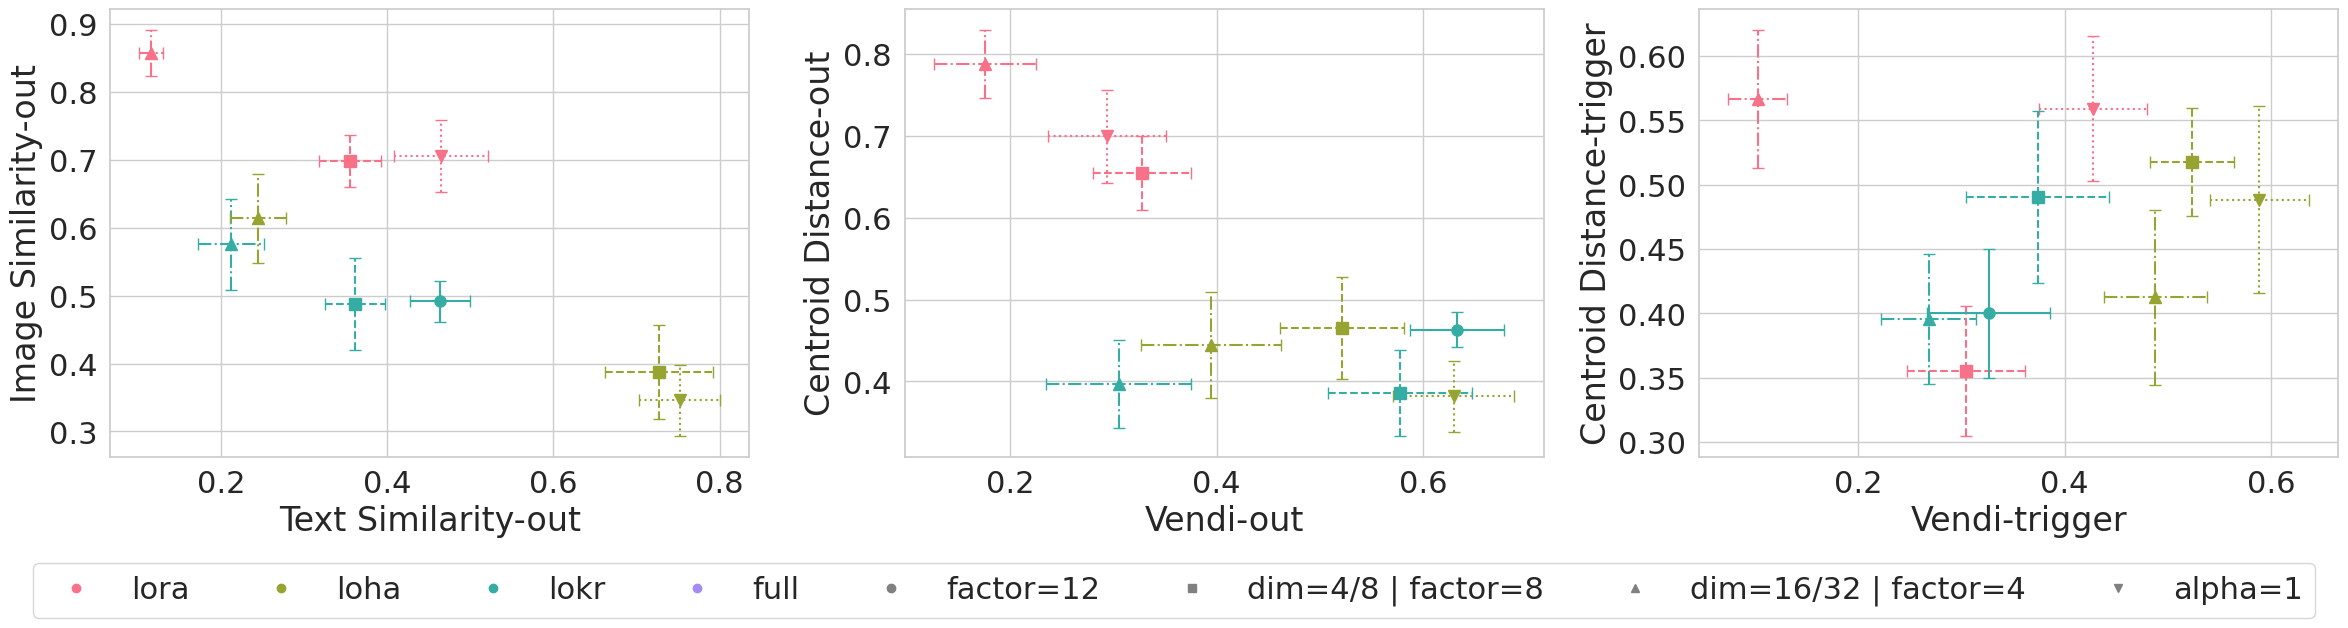

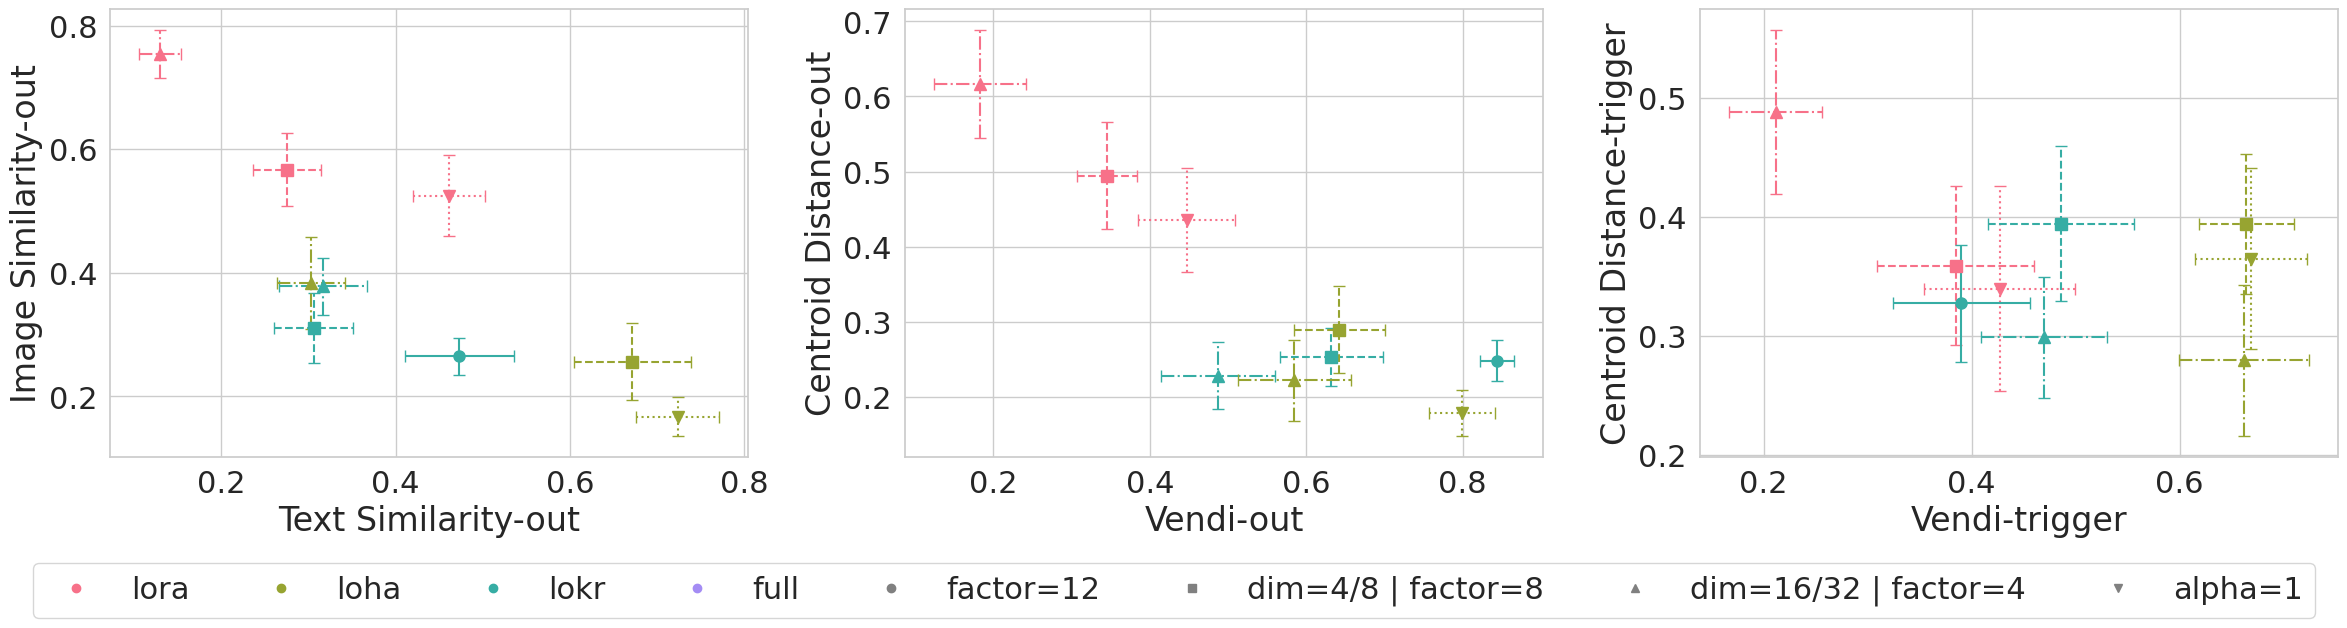

In [22]:
for step in [10, 30, 50]:
    plt.figure(figsize=figsize)

    for i, metric_pair in enumerate(metrics_to_plot):
        plt.subplot(1, 3, i + 1)
        legend_handles = plot_metrics_xy(metrics_aggregated,
                                         metric_pair[0],
                                         metric_pair[1],
                                         color_by='Algo',
                                         shape_by='Capacity',
                                         shape_mapping=shape_mapping,
                                         legend=False,
                                         step=step)
    fig = plt.gcf()
    fig.legend(handles=legend_handles,
               loc='lower center',
               bbox_to_anchor=bbox_to_anchor,
               ncol=len(legend_handles))
    plt.tight_layout()
    plt.savefig(
        f'figures/dim-alpha-factor/dim-alpha-factor-{step}_{category}_xyplot.png',
        bbox_inches='tight',
        pad_inches=0.2)

## Lr

In [23]:
metrics_aggregated = filter_config_and_aggregate(metrics_processed, ['Lr'],
                                                 extra_conodition)
metrics_aggregated = transform_attributes(metrics_aggregated,
                                          multiindex=True,
                                          drop=False)
shape_mapping = {
    1: 'lr=1e-4/5e-7',
    2: 'lr=5e-4/1e-6',
    3: 'lr=1e-3/5e-6',
}

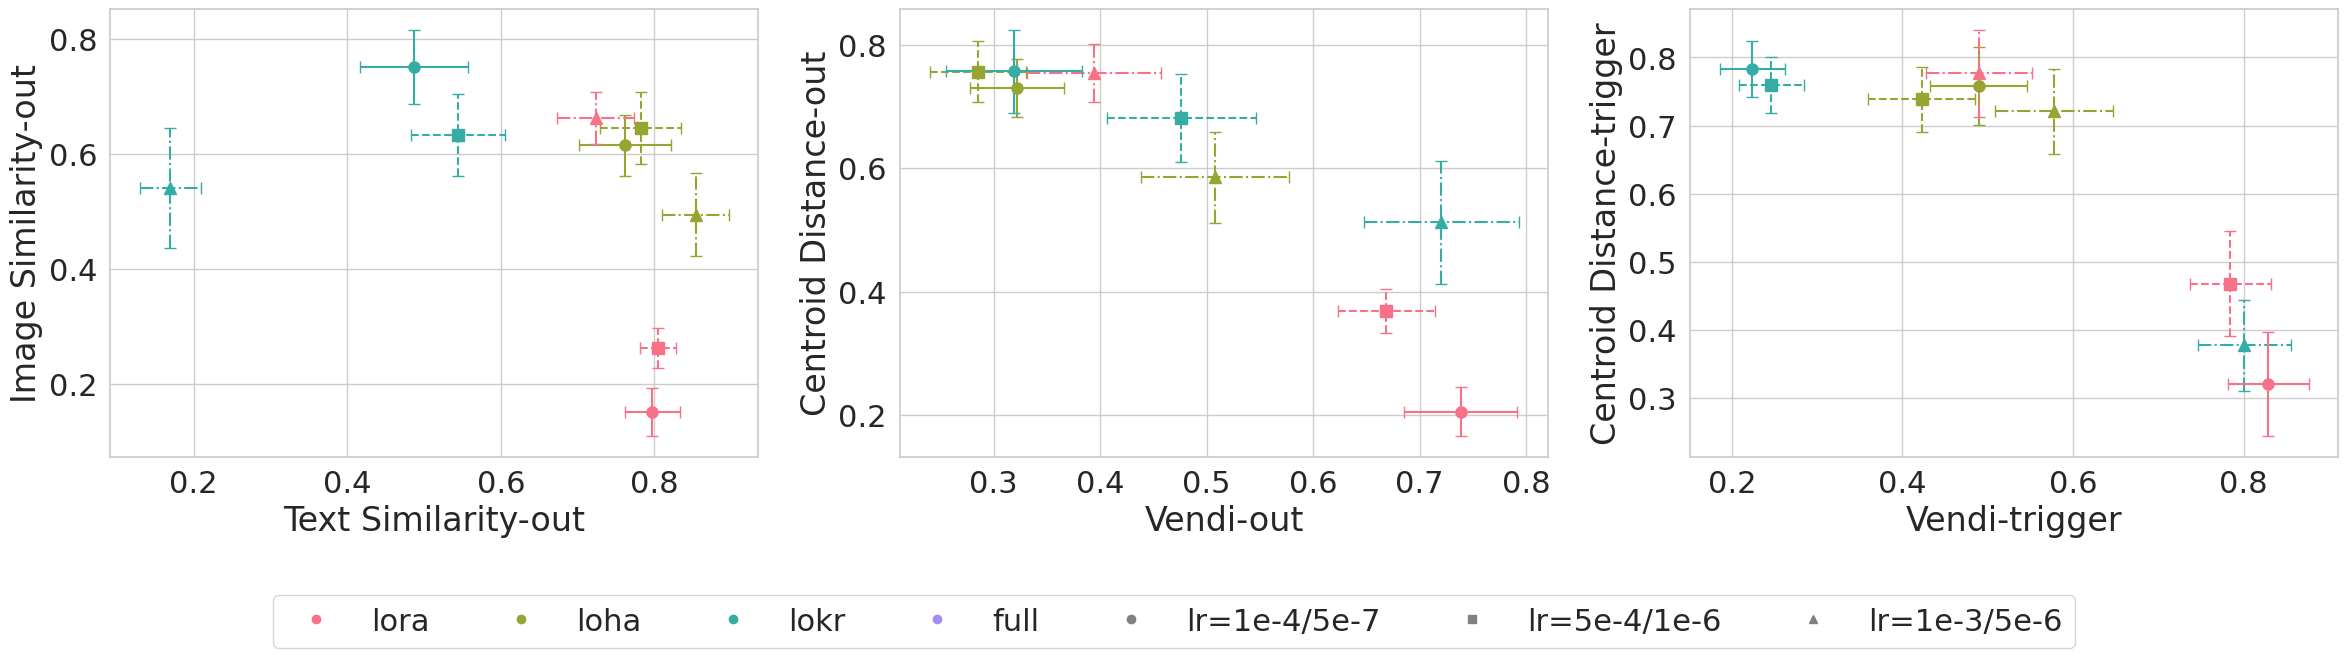

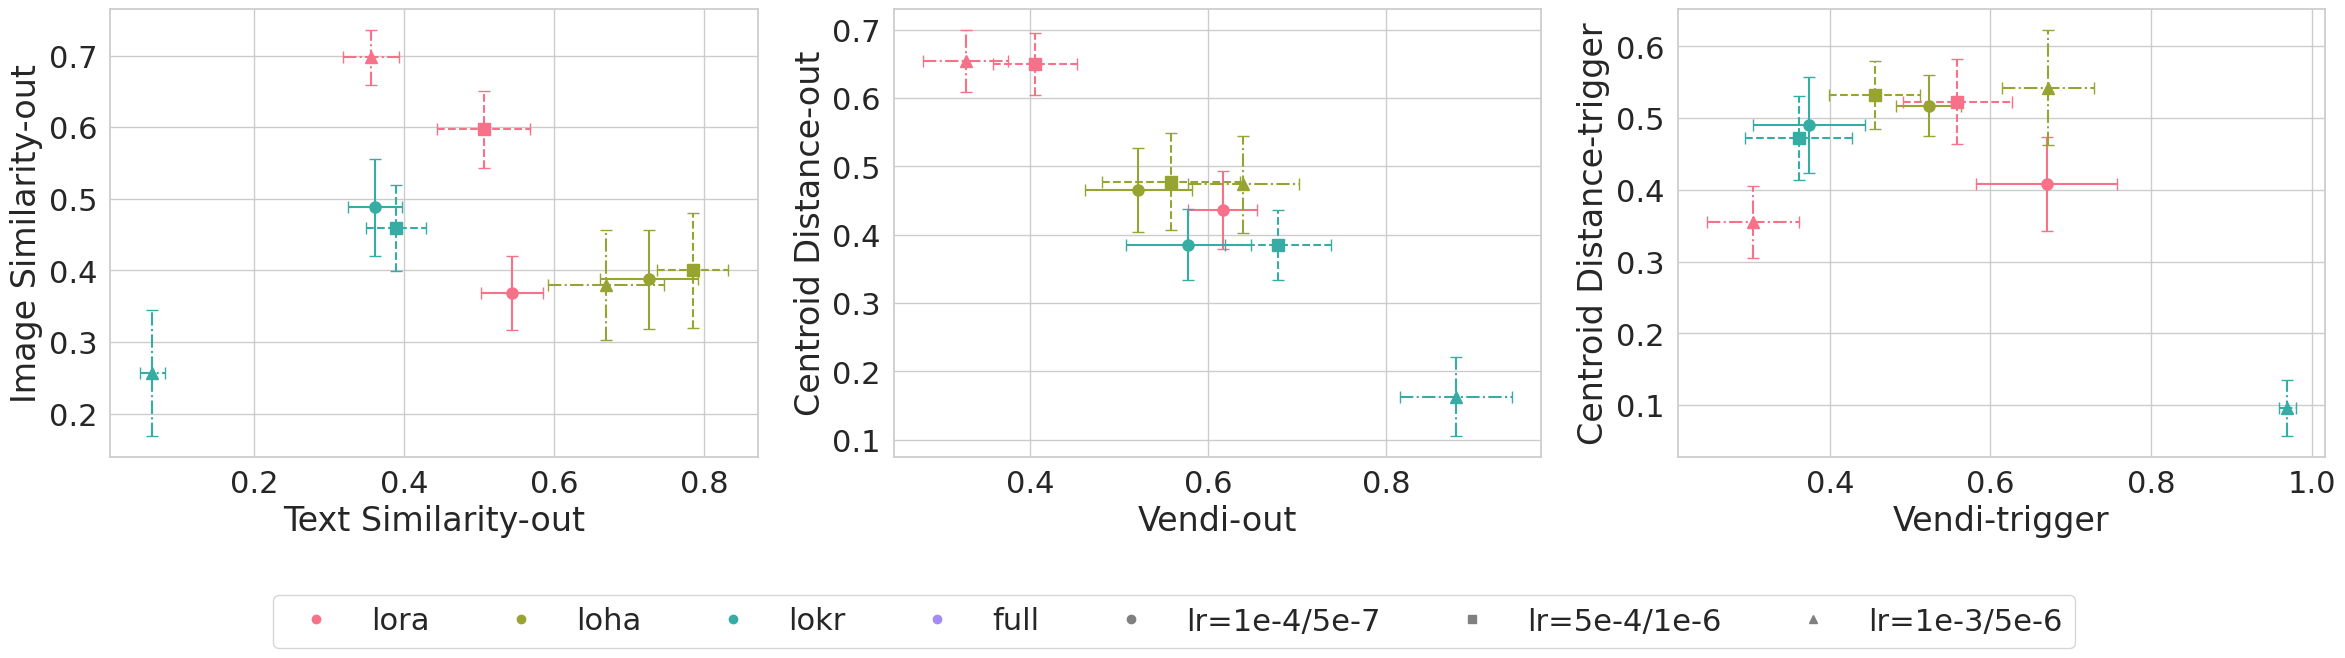

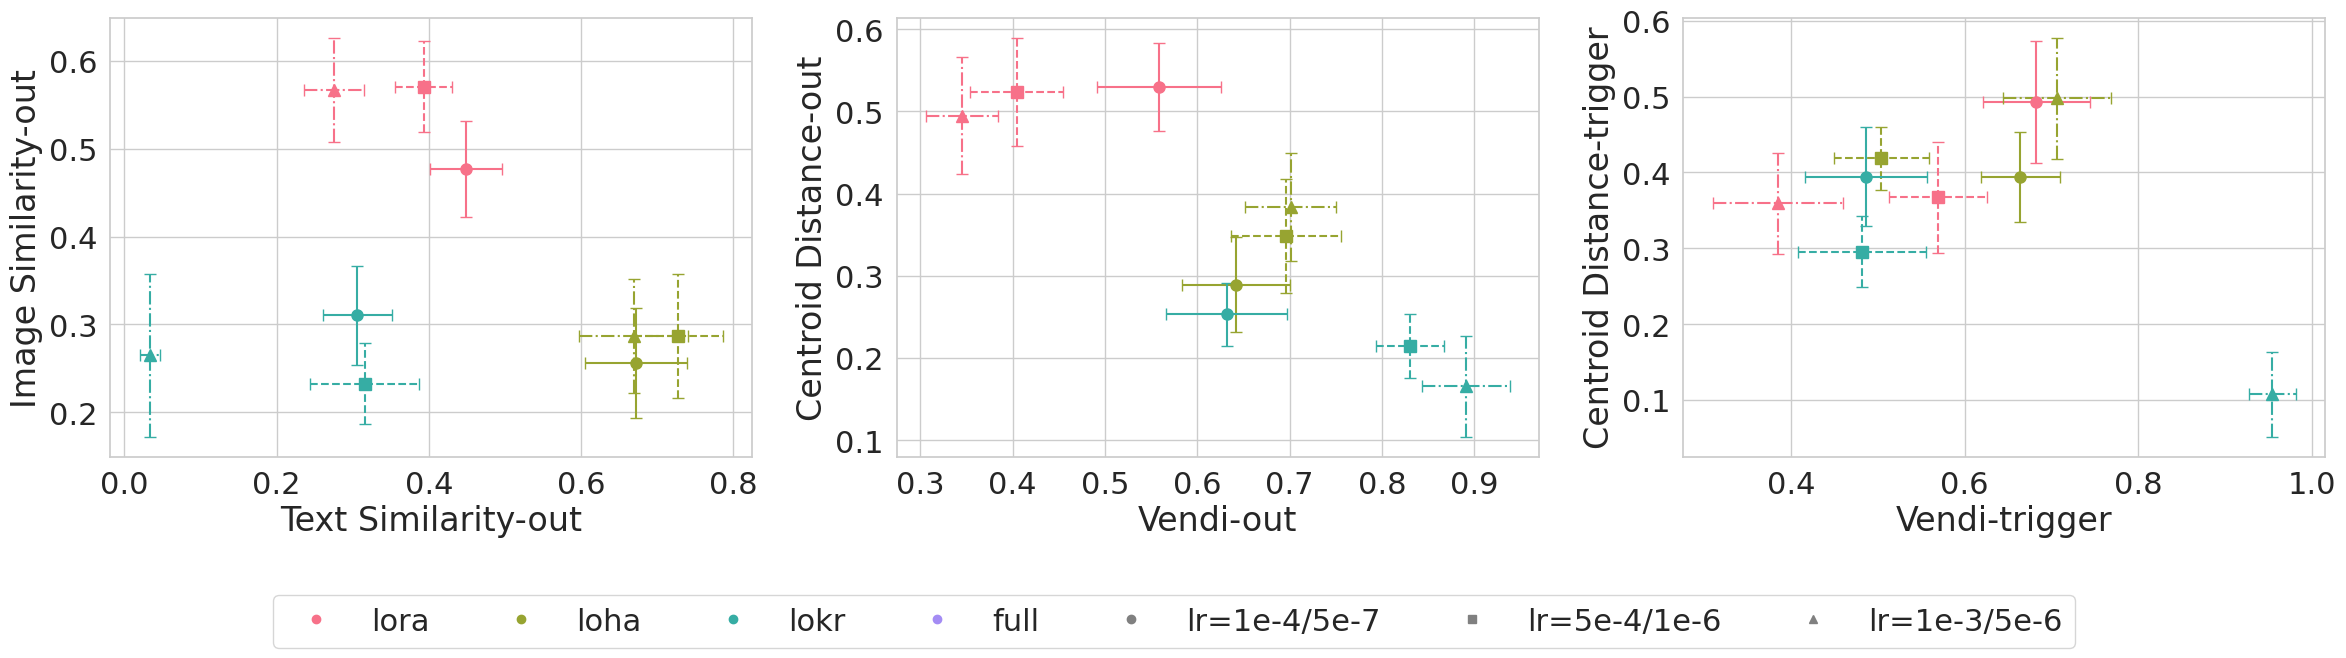

In [24]:
for step in [10, 30, 50]:
    plt.figure(figsize=figsize)

    for i, metric_pair in enumerate(metrics_to_plot):
        plt.subplot(1, 3, i + 1)
        legend_handles = plot_metrics_xy(metrics_aggregated,
                                         metric_pair[0],
                                         metric_pair[1],
                                         color_by='Algo',
                                         shape_by='Lr Level',
                                         shape_mapping=shape_mapping,
                                         legend=False,
                                         step=step)
    fig = plt.gcf()
    fig.legend(
        handles=legend_handles,
        loc='lower center',
        bbox_to_anchor=(0.5, -0.15),  # Adjust these coordinates to move the legend
        ncol=len(legend_handles))
    plt.tight_layout()
    plt.savefig(
        f'figures/lr/lr-{step}_{category}_xyplot.png',
        bbox_inches='tight',
        pad_inches=0.2)